In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
import photutils

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=15)

In [13]:
bias = np.arange(1028,1039,1)
dark5 = np.arange(1039, 1044,1)
dark10 = np.arange(1044,1049,1)
dark20 = np.arange(1049, 1054,1)

dflat = np.arange(1054, 1070,1)

skyflat = np.arange(1134,1139,1)

In [18]:
bias_median = np.zeros(shape=(img_np.shape))

bias_master = np.zeros(shape = (11, 1024, 1056))
i=0
for bi in bias:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(bi)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    bias_master[i,:] = loop_img
    
    i+=1

In [118]:
from tqdm import tqdm
#taking median of all bias measurements. Inefficient nested loop but should be fine.
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        bias_median[i,j] = np.median(bias_master[:,i,j])
        

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:54<00:00, 18.94it/s]


In [22]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Bias_Median.npy", bias_median)

Text(0.5, 1.0, 'Bias Median')

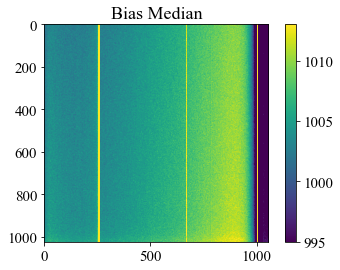

In [107]:
#plotting to check
Z = plt.imshow(bias_median, vmin=995, vmax=1013)
plt.colorbar(Z)

plt.title("Bias Median")

In [119]:
# appending all darks into one 3d array
dark_master = np.zeros(shape=(15, 1024, 1056))

i =0
for d5 in dark5:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d5)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/5 #subtracting bias from dark and dividing by exposure time.
    i+=1
    
for d10 in dark10:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d10)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/10
    i+=1
    
for d20 in dark20:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d20)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/20
    i+=1
    

In [120]:
#taking the median of all darks, same as before
dark_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        dark_median[i,j] = np.median(dark_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [02:15<00:00,  7.54it/s]


In [27]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Dark_Median.npy", dark_median)

Text(0.5, 1.0, 'Dark Image Median')

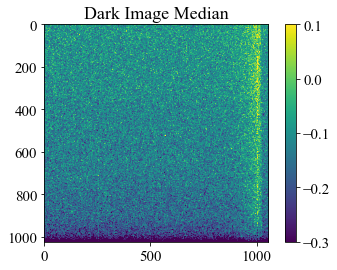

In [108]:
#plotting to check
Z = plt.imshow(dark_median, vmin=-0.3, vmax=0.1)
plt.colorbar(Z)

plt.title("Dark Image Median")

In [121]:
#Appending all sky flats into one 3d array. No loop here because we only had 5 skyflats.
flat_field_master = np.zeros(shape=(5, 1024, 1056))

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1134.fits')
loop_img = np.asarray(loop_hdul[0].data)

#subtracting the bias, then dividing by exposure time, and then subtracting the dark obtained in previous cell    
flat_field_master[0, :] = ((loop_img-bias_median)/5) - dark_median

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1135.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
flat_field_master[1, :] = ((loop_img-bias_median)/6) - dark_median

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1136.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
flat_field_master[2, :] = ((loop_img-bias_median)/10) - dark_median

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1137.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
flat_field_master[3, :] = ((loop_img-bias_median)/10) - dark_median

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1138.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
flat_field_master[4, :] = ((loop_img-bias_median)/10) - dark_median

In [122]:
#taking the median of all the sky_flats like before
flat_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        flat_median[i,j] = np.median(flat_field_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [02:17<00:00,  7.45it/s]


Text(0.5, 1.0, 'Flat Field Image Normalized Median')

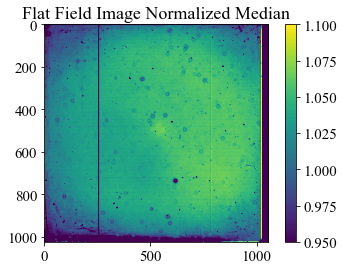

In [109]:
#normalizing the flat by the mean value
flat_median_norm = flat_median/np.mean(flat_median)

#plotting to check.
Z = plt.imshow(flat_median_norm, vmin=0.95, vmax=1.1)
plt.colorbar(Z)

plt.title("Flat Field Image Normalized Median")

In [82]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Flat_Median.npy", flat_median_norm)

In [83]:
#index of science observations
science = np.arange(1178, 1190, 1)

#Appending all science observations into one 3d array
science_master = np.zeros(shape=(12, 1024, 1056))

i=0
for pluto in science:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(pluto)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    #Subtract bias, divide by exposure time, then subtract dark. Divide all that by the normalized flat
    science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm
    i+=1

<ipython-input-83-08e780ef7012>:10: RuntimeWarning: divide by zero encountered in true_divide
  science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm
<ipython-input-83-08e780ef7012>:10: RuntimeWarning: invalid value encountered in true_divide
  science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm


In [123]:
#taking the median of all science data.
science_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        science_median[i,j] = np.median(science_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [02:12<00:00,  7.70it/s]


(0.0, 1014.0)

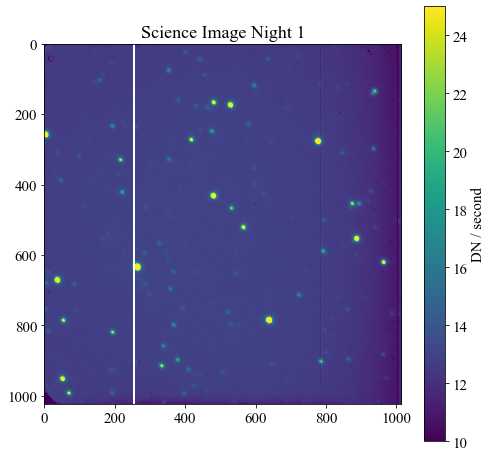

In [124]:
#plotting to check. 
plt.figure(figsize=(8,8))
Z = plt.imshow(science_median, vmin=10, vmax=25)
cbar=plt.colorbar(Z)
cbar.set_label("DN / second")
plt.title("Science Image Night 1")
plt.xlim(0,1014)

In [125]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Science_Median1.npy", science_median)